# Setup

In [13]:
import os
import re
import json
import glob

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

from astropy.constants import R_earth
import tensorflow as tf

from geexhp import datagen, datamod, datavis
from geexhp import stages as st_
from geexhp import datavis as dvis
dvis.configure_matplotlib()

In [14]:
# Load the dictionary containing the normalization statistics
with open('../data/normalization_stats.json', 'r') as f:
    stats = json.load(f)

# Load the best model
model_load = tf.keras.models.load_model("NN_22-01-colab-habex.keras")

In [15]:
# Denormalization functions for physical and chemical outputs
def denormalize_physical(predictions, stats, targets):
    original = np.zeros_like(predictions)
    for i, target in enumerate(targets):
        # Get stats: min, max, and best_n
        min_val = stats['outputs'][target]['min']
        max_val = stats['outputs'][target]['max']
        best_n = stats['outputs'][target]['best_n']
        # Inverse transformation:
        # prediction = ((val - min) / (max - min))^(1/best_n)
        # Thus, val = min + (max - min) * (prediction)^(best_n)
        original[:, i] = min_val + (max_val - min_val) * (predictions[:, i] ** best_n)
    return original

def denormalize_chemical(predictions, stats, targets):
    original = np.zeros_like(predictions)
    for i, target in enumerate(targets):
        best_n = stats['outputs'][target]['best_n']
        # Inverse transformation: prediction = val^(1/best_n) so val = prediction^(best_n)
        original[:, i] = predictions[:, i] ** best_n
    return original

In [16]:
# Target lists
physical_targets = [
    "OBJECT-RADIUS-REL-EARTH",
    "OBJECT-GRAVITY",
    "ATMOSPHERE-TEMPERATURE",
    "ATMOSPHERE-PRESSURE"
]
main_chemical_targets = ['O2', 'O3']
other_chemical_targets = ['CH4', 'CO', 'CO2', 'H2O', 'N2', 'N2O']

In [17]:
# Just for fun :3
def format_title_luvoir(file_name):
    base = file_name.replace('.npy', '')
    parts = base.split('_')

    if parts[-1].lower() == "habex":
        parts.pop()

    if len(parts) >= 2:
        era = parts[0]
        distance = parts[1]
    else:
        match = re.match(r"(.+?)(\d+pc)$", parts[0], flags=re.IGNORECASE)
        if match:
            era, distance = match.groups()
        else:
            era = parts[0]
            distance = ""

    era = era.capitalize().replace("without", " without ")
    distance = re.sub(r"(\d+)(pc)", r"\1 pc", distance, flags=re.IGNORECASE)

    if distance:
        title = f"{era} at {distance} - HabEx/SS"
    else:
        title = f"{era} - HabEx/SS"
        
    return title

def get_stage_from_filename(file_name):
    lower = file_name.lower()
    if "modern" in lower:
        return "modern"
    elif "proterozoic" in lower:
        return "proterozoic"
    elif "archean" in lower:
        return "archean"
    else:
        return "modern"

# HABEX/SS

Processing file: proterozoic10pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.148754,0.998887,0.149867
1,OBJECT-GRAVITY,12.254905,9.807000,2.447905
2,ATMOSPHERE-TEMPERATURE,286.006897,289.000000,-2.993103
3,ATMOSPHERE-PRESSURE,1586.919556,959.000000,627.919434



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,6.818940e-03,2.629730e-03,0.004189
1,O3,3.000000e-08,3.000000e-08,0.000000



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,4.756440e-03,2.139460e-03,0.002617
1,CO,2.621000e-05,1.741000e-05,0.000009
2,CO2,7.160990e-03,1.252251e-02,-0.005362
3,H2O,5.152200e-03,4.682740e-03,0.000469
4,N2,9.738649e-01,9.780081e-01,-0.004143
5,N2O,1.000000e-08,1.000000e-08,0.000000


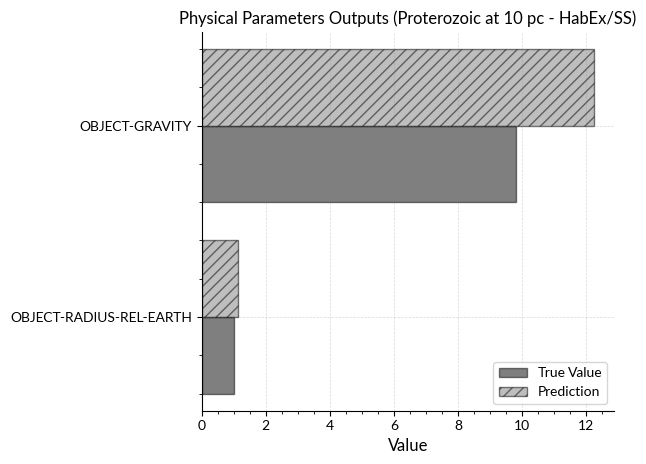

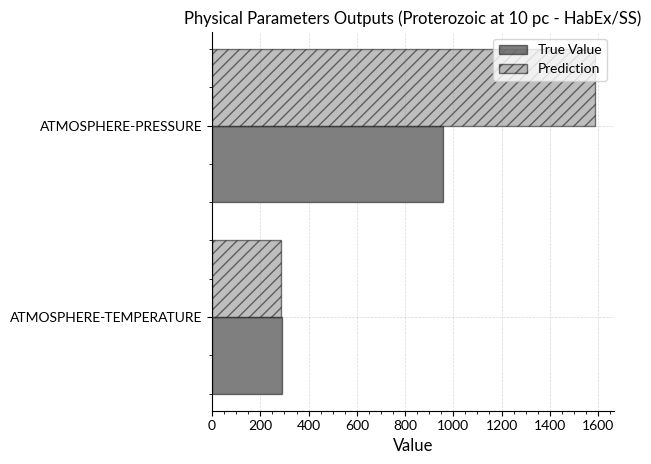

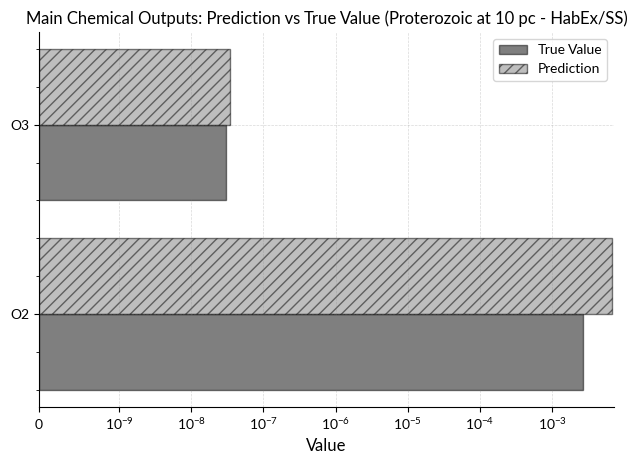

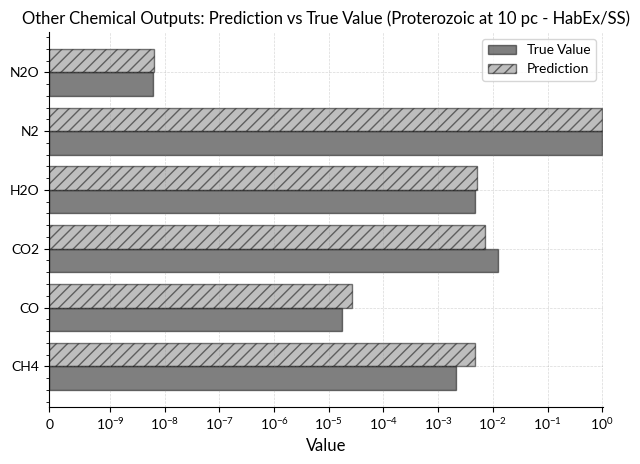



Processing file: archean5pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.217803,0.998887,0.218916
1,OBJECT-GRAVITY,13.650187,9.807000,3.843187
2,ATMOSPHERE-TEMPERATURE,279.046967,276.207386,2.839580
3,ATMOSPHERE-PRESSURE,1968.697510,1000.000000,968.697510



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.001942,0.001927,0.000015
1,CO,0.000575,0.001609,-0.001033
2,CO2,0.011686,0.012595,-0.000909
3,H2O,0.000112,0.000162,-0.000050
4,N2,0.984309,0.983706,0.000602
5,N2O,0.000000,0.000000,0.000000


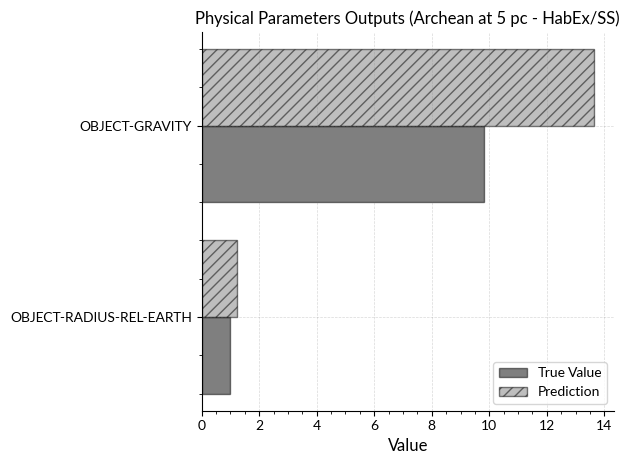

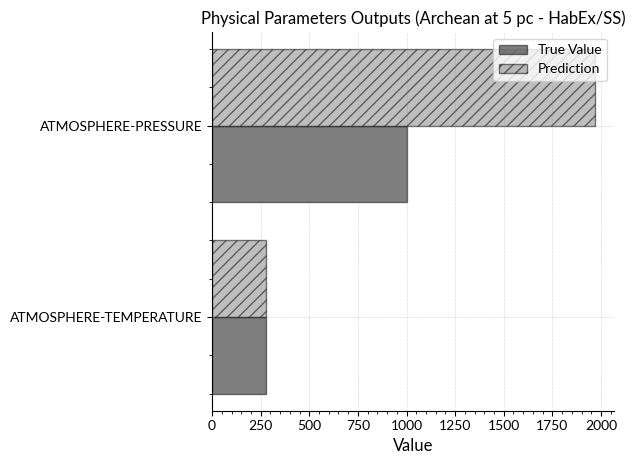

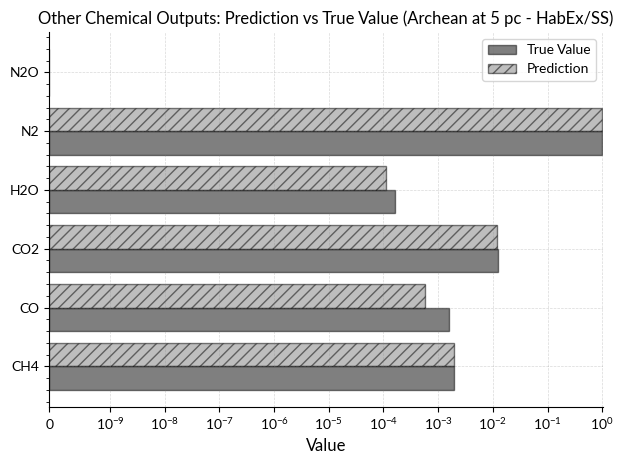



Processing file: proterozoic5pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.197342,0.998887,0.198455
1,OBJECT-GRAVITY,13.220423,9.807000,3.413423
2,ATMOSPHERE-TEMPERATURE,289.028870,289.000000,0.028870
3,ATMOSPHERE-PRESSURE,1848.162598,959.000000,889.162598



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,1.564530e-03,2.629730e-03,-0.001065
1,O3,3.000000e-08,3.000000e-08,0.000000



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.003263,2.139460e-03,0.001123
1,CO,0.000021,1.741000e-05,0.000003
2,CO2,0.011558,1.252251e-02,-0.000964
3,H2O,0.003251,4.682740e-03,-0.001432
4,N2,0.984865,9.780081e-01,0.006857
5,N2O,0.000000,1.000000e-08,-0.000000


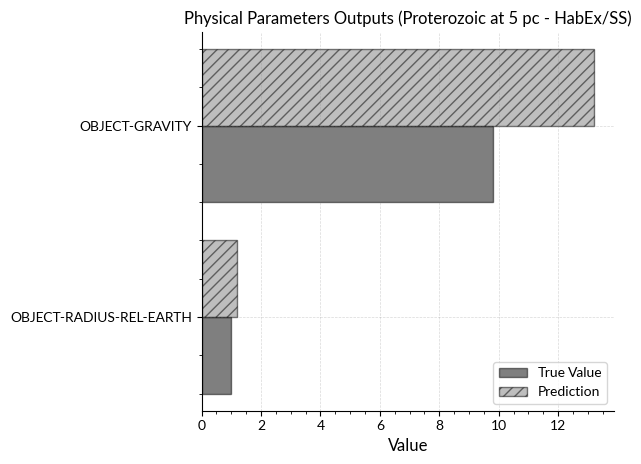

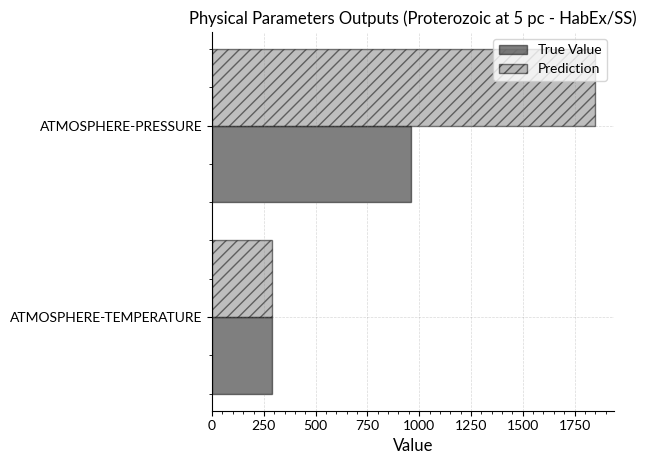

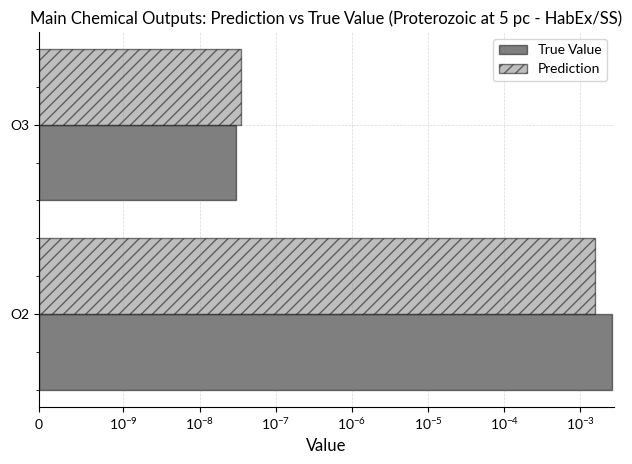

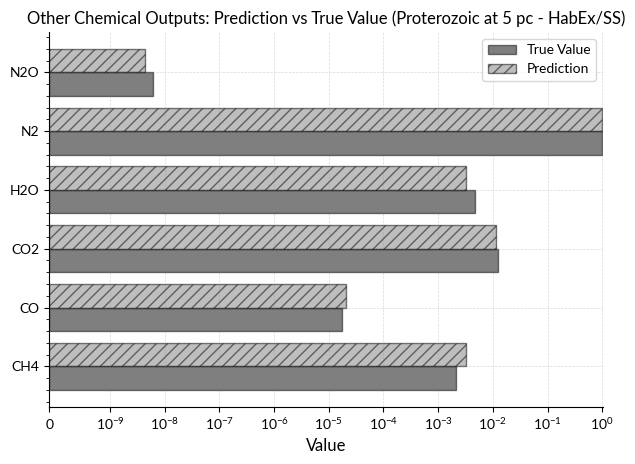



Processing file: modernwithoutO2_10pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.135963,0.998887,0.137076
1,OBJECT-GRAVITY,12.024549,9.807000,2.217549
2,ATMOSPHERE-TEMPERATURE,281.442322,288.200000,-6.757678
3,ATMOSPHERE-PRESSURE,1528.467896,1013.000000,515.467896



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.000281,0.000000,2.813600e-04
1,O3,0.000003,0.000002,8.600000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,6.300000e-07,1.720000e-06,-1.080000e-06
1,CO,8.200000e-07,3.210000e-06,-2.390000e-06
2,CO2,1.127300e-04,3.830100e-04,-2.702800e-04
3,H2O,4.622400e-04,4.620700e-04,1.700000e-07
4,N2,1.000000e+00,7.882168e-01,2.117832e-01
5,N2O,9.000000e-08,3.200000e-07,-2.300000e-07


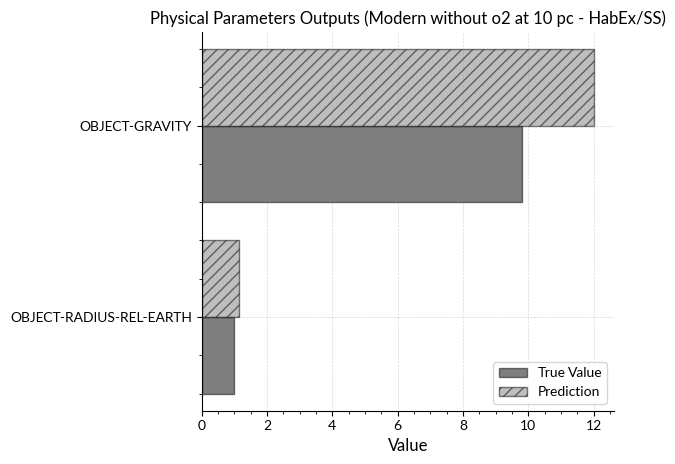

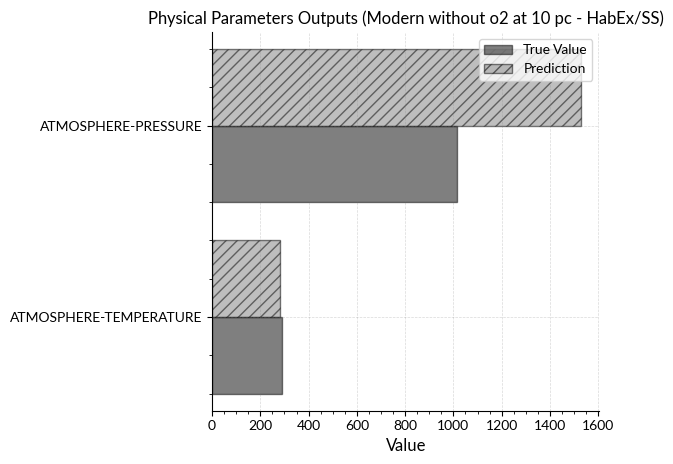

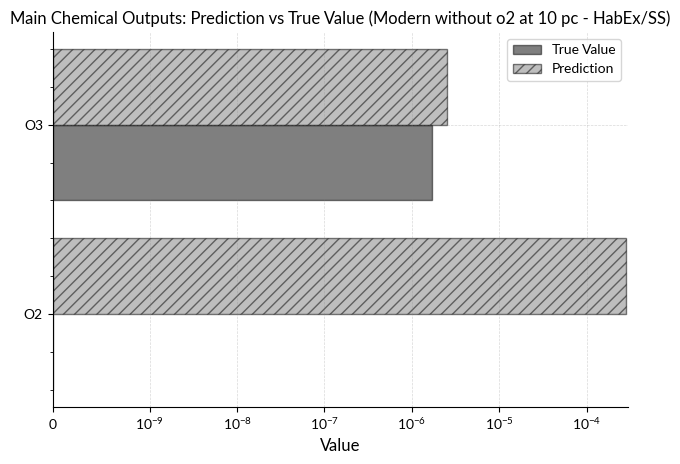

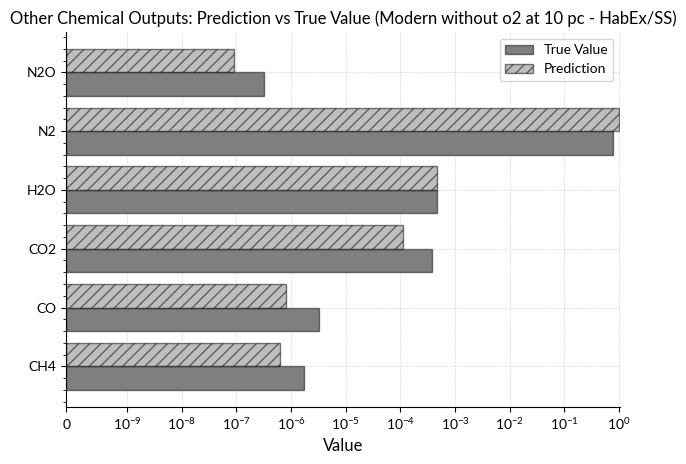



Processing file: archean15pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.187880,0.998887,0.188993
1,OBJECT-GRAVITY,13.028179,9.807000,3.221179
2,ATMOSPHERE-TEMPERATURE,286.199127,276.207386,9.991741
3,ATMOSPHERE-PRESSURE,1794.217041,1000.000000,794.217163



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.001727,0.001927,-0.000200
1,CO,0.000737,0.001609,-0.000871
2,CO2,0.018740,0.012595,0.006144
3,H2O,0.000163,0.000162,0.000002
4,N2,0.965312,0.983706,-0.018394
5,N2O,0.000000,0.000000,0.000000


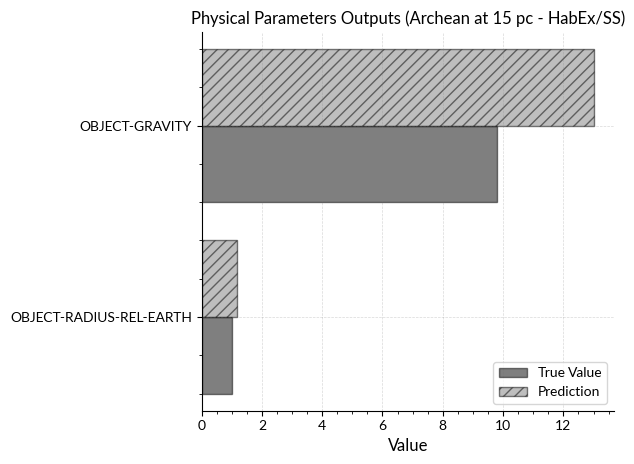

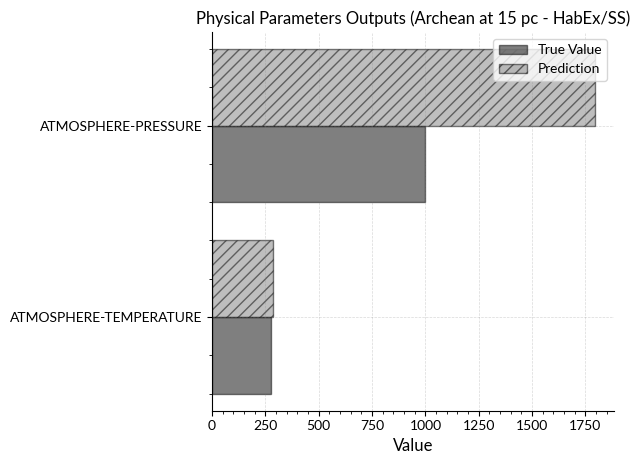

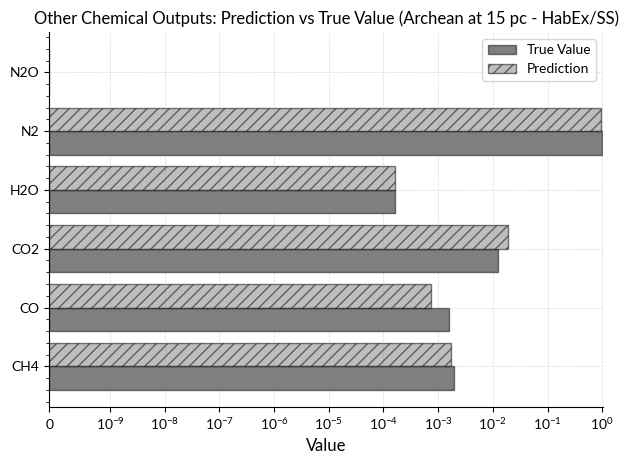



Processing file: modern5pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.192348,0.998887,0.193461
1,OBJECT-GRAVITY,13.107300,9.807000,3.300300
2,ATMOSPHERE-TEMPERATURE,281.718414,288.200000,-6.481586
3,ATMOSPHERE-PRESSURE,1817.413086,1013.000000,804.413086



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.094160,0.210931,-1.167708e-01
1,O3,0.000002,0.000002,2.500000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,2.040000e-06,1.720000e-06,3.300000e-07
1,CO,1.820000e-06,3.210000e-06,-1.390000e-06
2,CO2,1.347500e-04,3.830100e-04,-2.482600e-04
3,H2O,2.971900e-04,4.620700e-04,-1.648700e-04
4,N2,8.999116e-01,7.882168e-01,1.116948e-01
5,N2O,2.100000e-07,3.200000e-07,-1.100000e-07


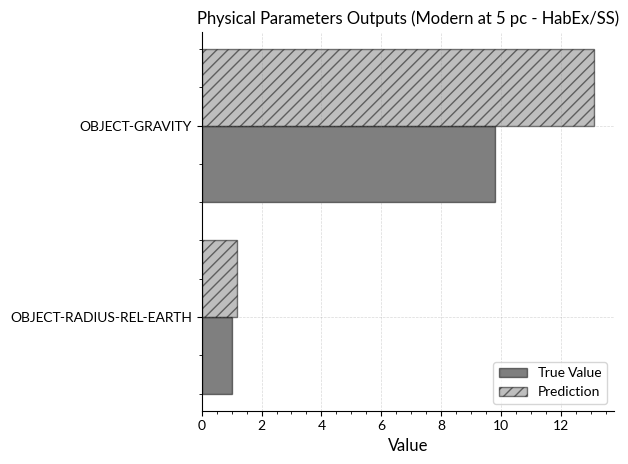

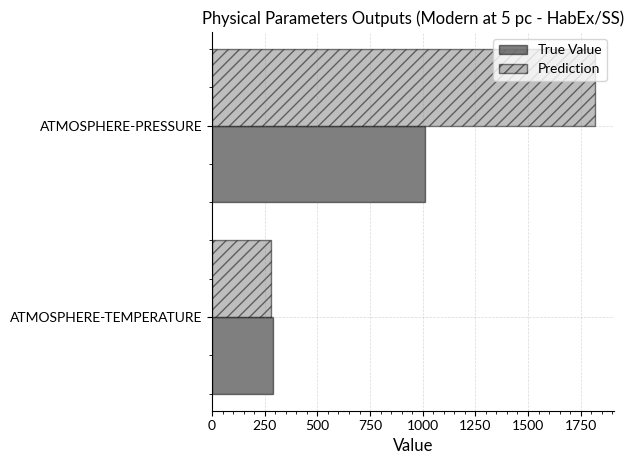

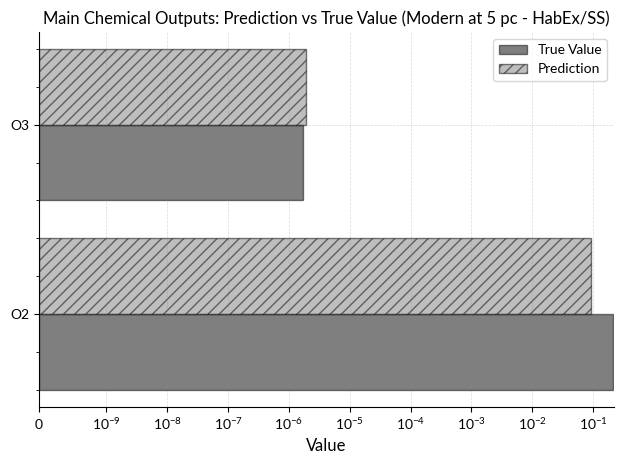

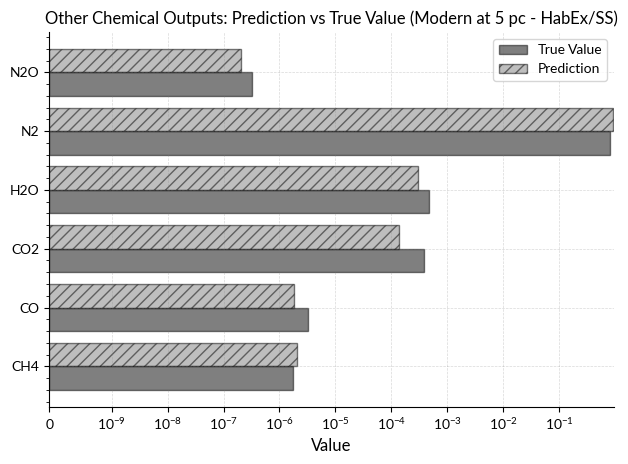



Processing file: archean10pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.212759,0.998887,0.213872
1,OBJECT-GRAVITY,13.539692,9.807000,3.732691
2,ATMOSPHERE-TEMPERATURE,281.214661,276.207386,5.007274
3,ATMOSPHERE-PRESSURE,1937.709351,1000.000000,937.709351



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.002158,0.001927,0.000231
1,CO,0.000764,0.001609,-0.000844
2,CO2,0.011267,0.012595,-0.001328
3,H2O,0.000080,0.000162,-0.000082
4,N2,0.982851,0.983706,-0.000855
5,N2O,0.000000,0.000000,0.000000


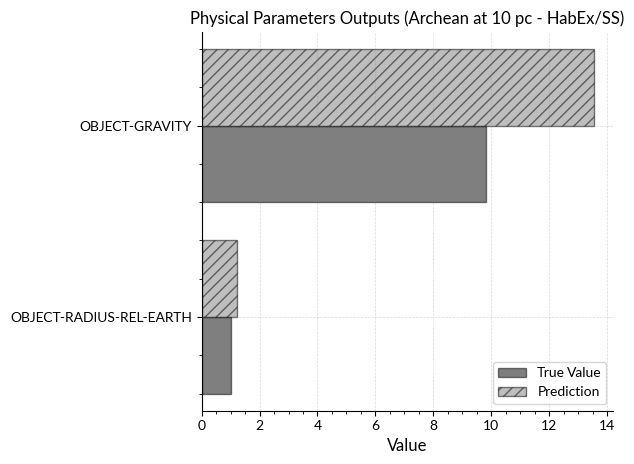

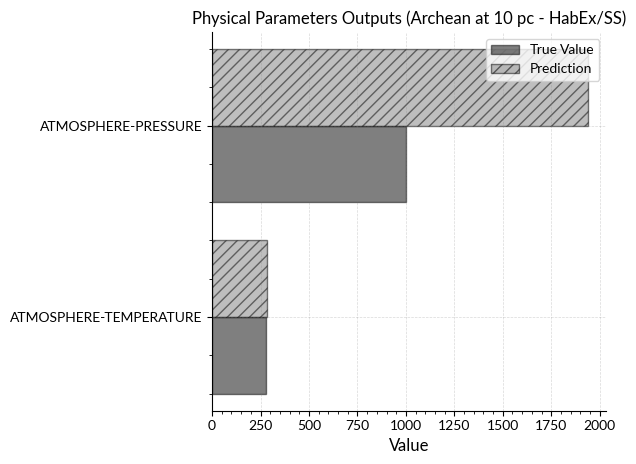

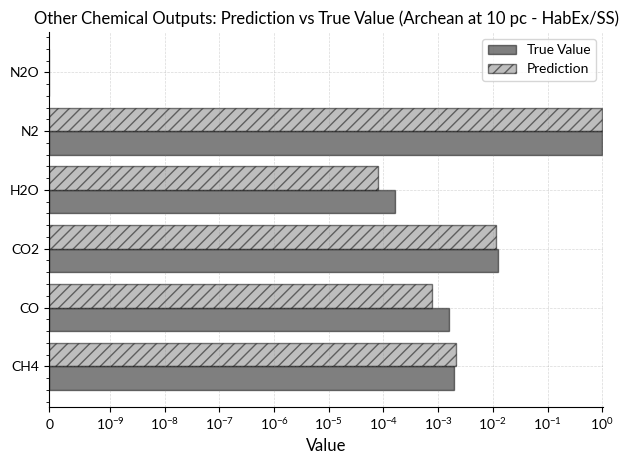



Processing file: modern15pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.156599,0.998887,0.157712
1,OBJECT-GRAVITY,12.397188,9.807000,2.590188
2,ATMOSPHERE-TEMPERATURE,285.492371,288.200000,-2.707629
3,ATMOSPHERE-PRESSURE,1623.498535,1013.000000,610.498657



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.115604,0.210931,-9.532731e-02
1,O3,0.000002,0.000002,7.700000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,4.200000e-07,1.720000e-06,-1.300000e-06
1,CO,1.750000e-06,3.210000e-06,-1.460000e-06
2,CO2,1.499200e-04,3.830100e-04,-2.330900e-04
3,H2O,6.586300e-04,4.620700e-04,1.965700e-04
4,N2,8.772017e-01,7.882168e-01,8.898492e-02
5,N2O,2.900000e-07,3.200000e-07,-3.000000e-08


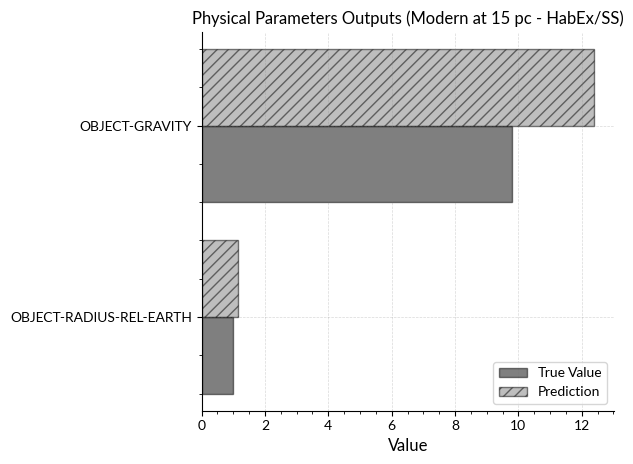

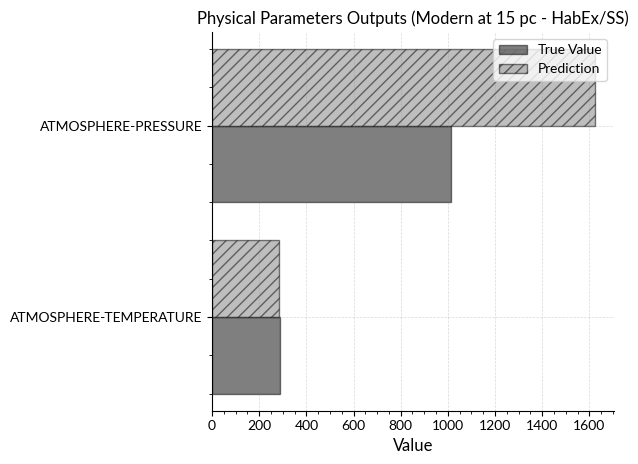

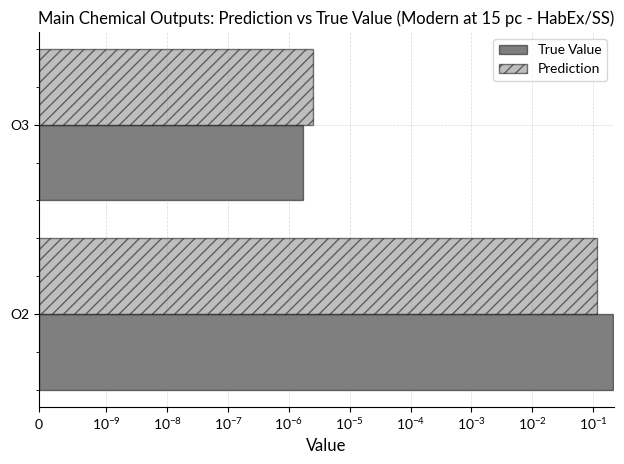

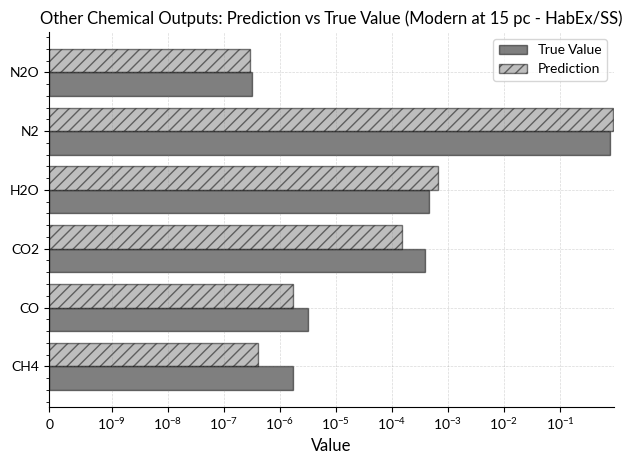



Processing file: modernwithoutO3_10pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.141205,0.998887,0.142318
1,OBJECT-GRAVITY,12.128675,9.807000,2.321675
2,ATMOSPHERE-TEMPERATURE,294.809723,288.200000,6.609723
3,ATMOSPHERE-PRESSURE,1552.036987,1013.000000,539.036987



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.159816,0.210931,-0.051115
1,O3,0.000000,0.000000,0.000000



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,1.790000e-06,1.720000e-06,8.000000e-08
1,CO,2.840000e-06,3.210000e-06,-3.700000e-07
2,CO2,8.368000e-05,3.830100e-04,-2.993200e-04
3,H2O,3.088400e-04,4.620700e-04,-1.532300e-04
4,N2,8.826171e-01,7.882168e-01,9.440030e-02
5,N2O,2.000000e-08,3.200000e-07,-3.100000e-07


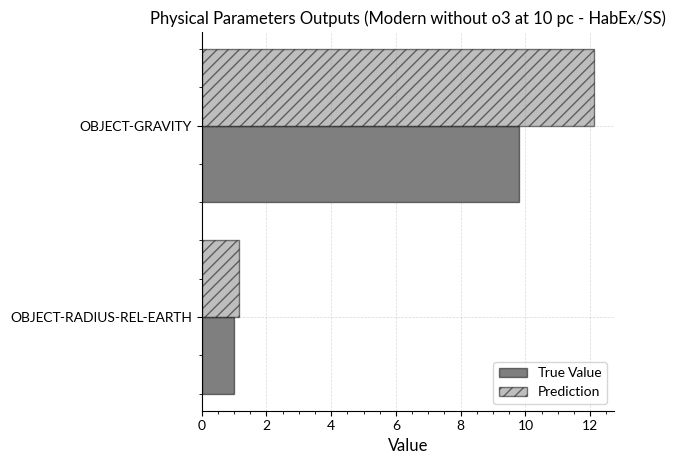

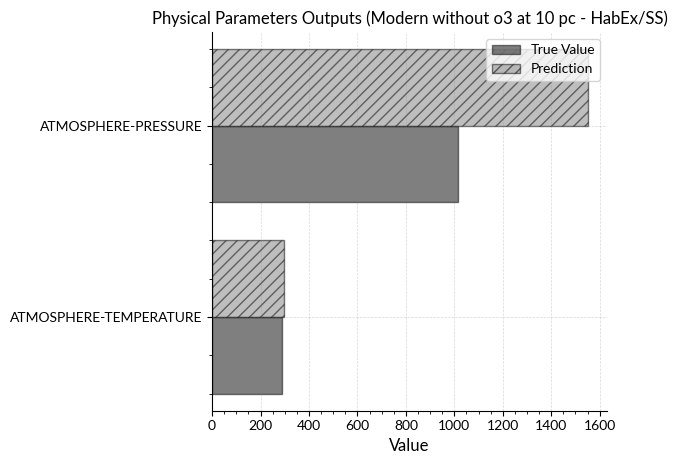

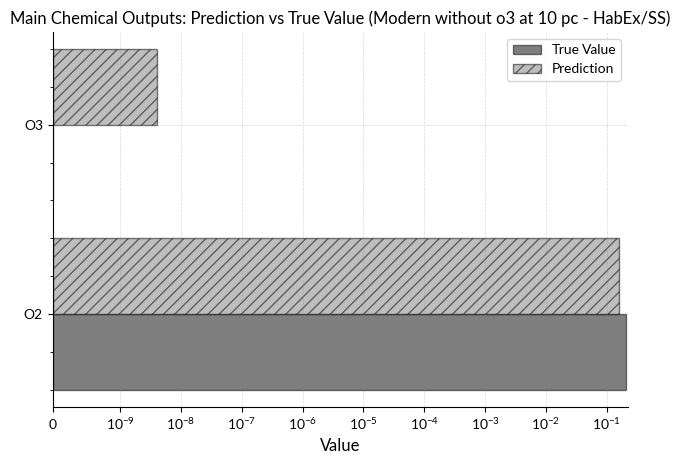

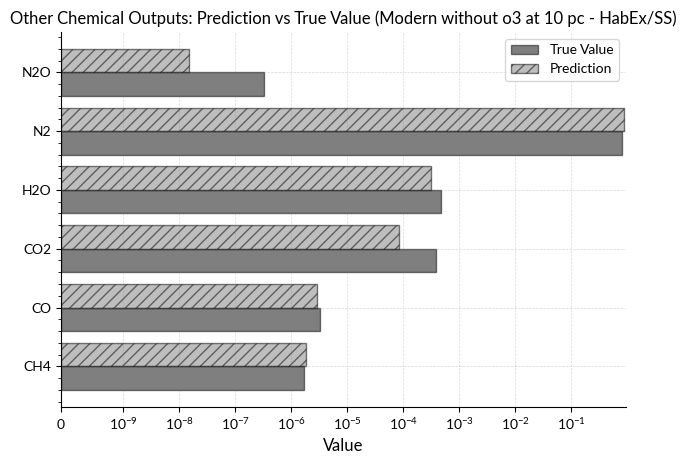



Processing file: modern10pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.165290,0.998887,0.166403
1,OBJECT-GRAVITY,12.556484,9.807000,2.749483
2,ATMOSPHERE-TEMPERATURE,280.496002,288.200000,-7.703998
3,ATMOSPHERE-PRESSURE,1667.277954,1013.000000,654.277954



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.112022,0.210931,-9.890918e-02
1,O3,0.000002,0.000002,6.000000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,2.080000e-06,1.720000e-06,3.600000e-07
1,CO,2.690000e-06,3.210000e-06,-5.200000e-07
2,CO2,1.984800e-04,3.830100e-04,-1.845200e-04
3,H2O,5.428400e-04,4.620700e-04,8.077000e-05
4,N2,8.759493e-01,7.882168e-01,8.773251e-02
5,N2O,1.900000e-07,3.200000e-07,-1.300000e-07


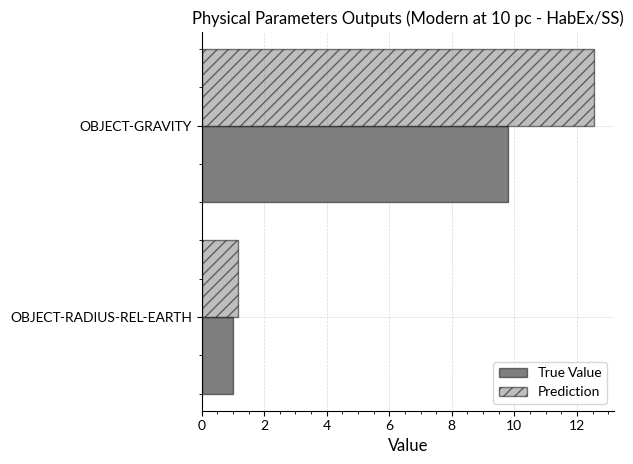

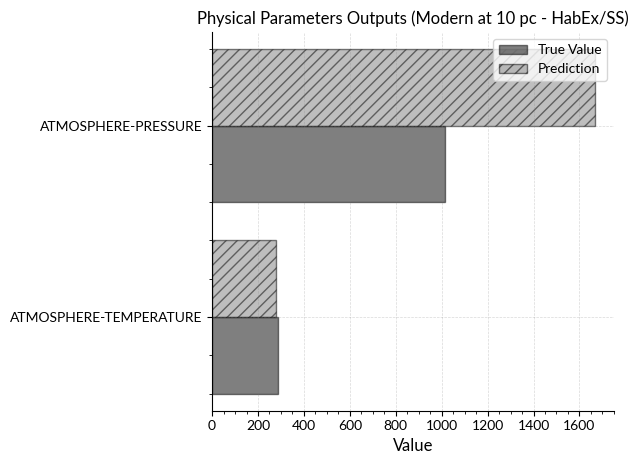

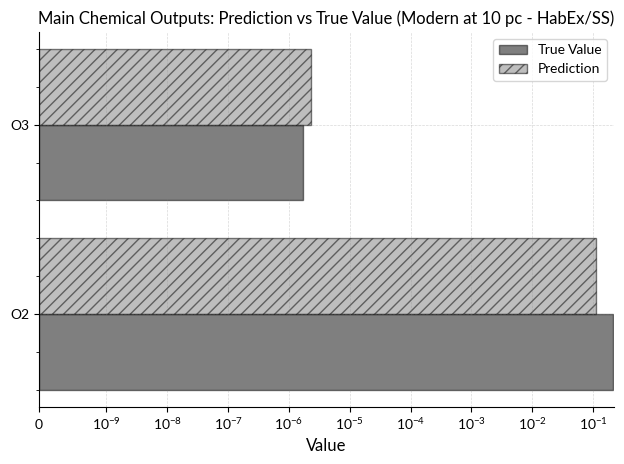

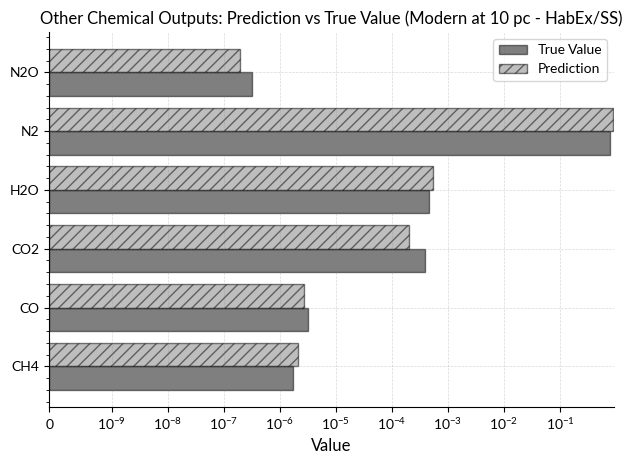



Processing file: proterozoic15pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.108866,0.998887,0.109979
1,OBJECT-GRAVITY,11.550195,9.807000,1.743196
2,ATMOSPHERE-TEMPERATURE,295.523071,289.000000,6.523071
3,ATMOSPHERE-PRESSURE,1406.320190,959.000000,447.320190



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,1.138482e-02,2.629730e-03,8.755090e-03
1,O3,6.000000e-08,3.000000e-08,3.000000e-08



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,4.069280e-03,2.139460e-03,1.929820e-03
1,CO,2.037000e-05,1.741000e-05,2.960000e-06
2,CO2,2.381382e-02,1.252251e-02,1.129131e-02
3,H2O,9.768790e-03,4.682740e-03,5.086050e-03
4,N2,9.302739e-01,9.780081e-01,-4.773416e-02
5,N2O,2.000000e-08,1.000000e-08,1.000000e-08


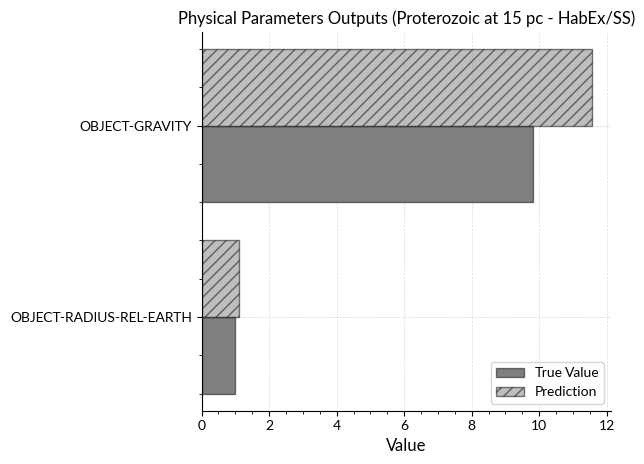

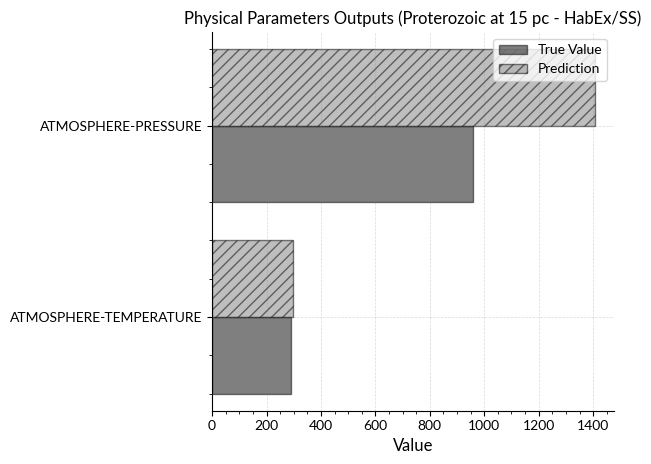

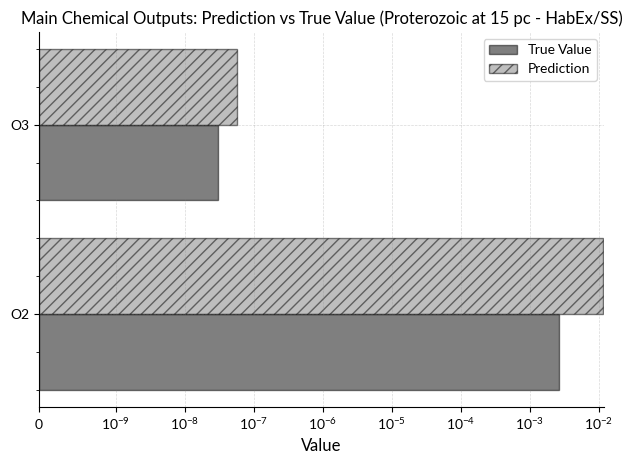

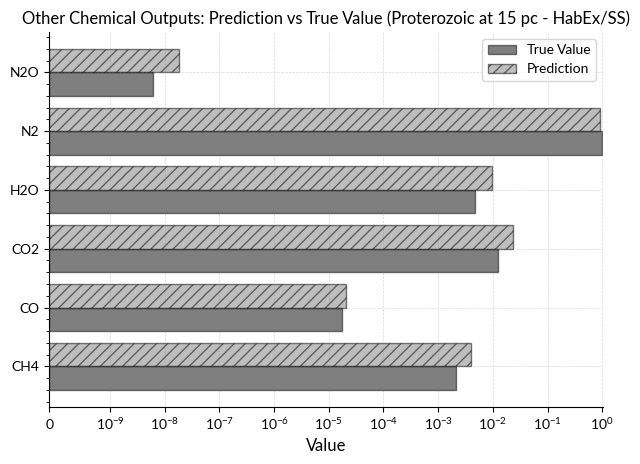

In [18]:
npy_files = glob.glob("../data/tests/*habex*.npy")

for file_path in npy_files:
    ############ DATA PROCESSING ############
    file_name = os.path.basename(file_path)
    formatted_title = format_title_luvoir(file_name)
    print(f"Processing file: {file_name}")
    
    data = np.load(file_path, allow_pickle=True)
    
    uv = data[0]["NOISY_ALBEDO"]
    vis = data[1]["NOISY_ALBEDO"]
    nir = data[2]["NOISY_ALBEDO"]
    
    uv_mean, uv_std = stats['inputs']['SS-UV']['mean'], stats['inputs']['SS-UV']['std']
    vis_mean, vis_std = stats['inputs']['SS-Vis']['mean'], stats['inputs']['SS-Vis']['std']
    nir_mean, nir_std = stats['inputs']['SS-NIR']['mean'], stats['inputs']['SS-NIR']['std']

    ############ DENORMALIZATION ############
    uv_normalized = (uv - uv_mean) / uv_std
    vis_normalized = (vis - vis_mean) / vis_std
    nir_normalized = (nir - nir_mean) / nir_std

    uv_normalized = uv_normalized.reshape(1, 7, 1)
    vis_normalized = vis_normalized.reshape(1, 109, 1)
    nir_normalized = nir_normalized.reshape(1, 25, 1)
    
    predictions = model_load.predict([uv_normalized, vis_normalized, nir_normalized])
    
    physical_pred = denormalize_physical(predictions['physical_output'], stats, physical_targets)
    main_chem_pred = denormalize_chemical(predictions['main_chemical_output'], stats, main_chemical_targets)
    other_chem_pred = denormalize_chemical(predictions['other_chemical_output'], stats, other_chemical_targets)
    
    ############ COMPARISON TABLES ############
    def get_gt(target):
        val = data[0].get(target, None)
        if val is None:
            return 0.0
        try:
            return float(val)
        except (ValueError, TypeError):
            return 0.0

    def build_comparison_df(targets, pred_values):
        data_list = []
        for i, target in enumerate(targets):
            pred_val = pred_values[0][i]
            gt_val = get_gt(target)
            diff = pred_val - gt_val
            data_list.append({
                "Target": target,
                "Prediction": pred_val,
                "True Value": gt_val,
                "Difference": diff
            })
        return pd.DataFrame(data_list)

    physical_df = build_comparison_df(physical_targets, physical_pred)
    main_chem_df = build_comparison_df(main_chemical_targets, main_chem_pred)
    other_chem_df = build_comparison_df(other_chemical_targets, other_chem_pred)
    
    print("\nPhysical Outputs Comparison:")
    display(physical_df.round(8))
    
    if 'archean' not in file_name.lower():
        print("\nMain Chemical Outputs Comparison:")
        display(main_chem_df.round(8))
    
    print("\nOther Chemical Outputs Comparison:")
    display(other_chem_df.round(8))

    ############ PLOTTING ############
    low_physical_targets = ["OBJECT-RADIUS-REL-EARTH", "OBJECT-GRAVITY"]
    high_physical_targets = ["ATMOSPHERE-TEMPERATURE", "ATMOSPHERE-PRESSURE"]
    
    low_physical_df = physical_df[physical_df["Target"].isin(low_physical_targets)]
    high_physical_df = physical_df[physical_df["Target"].isin(high_physical_targets)]
    
    if not low_physical_df.empty:
        y_low = range(len(low_physical_df))
        plt.barh(y_low, low_physical_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_low], low_physical_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_low], low_physical_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Physical Parameters Outputs ({formatted_title})")
        plt.legend()
        plt.tight_layout()
        plt.show()

    if not high_physical_df.empty:
        y_high = range(len(high_physical_df))
        plt.barh(y_high, high_physical_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_high], high_physical_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_high], high_physical_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Physical Parameters Outputs ({formatted_title})")
        plt.legend(loc="upper right")
        plt.tight_layout()
        plt.show()

    if 'archean' not in file_name.lower():
        y_main = range(len(main_chem_df))
        plt.barh(y_main, main_chem_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_main], main_chem_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_main], main_chem_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Main Chemical Outputs: Prediction vs True Value ({formatted_title})")
        plt.legend(loc="upper right")
        plt.xscale('symlog', linthresh=1e-9)
        plt.tight_layout()
        plt.show()

    y_other = range(len(other_chem_df))
    plt.barh(y_other, other_chem_df["True Value"], height=0.4, label="True Value",
                color='black', alpha=0.5, edgecolor='black')
    plt.barh([i + 0.4 for i in y_other], other_chem_df["Prediction"], height=0.4, label="Prediction",
                color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
    plt.yticks([i + 0.2 for i in y_other], other_chem_df["Target"])
    plt.xlabel("Value")
    plt.title(f"Other Chemical Outputs: Prediction vs True Value ({formatted_title})")
    plt.legend(loc="upper right")
    plt.xscale('symlog', linthresh=1e-9)
    plt.tight_layout()
    plt.show()

    print("\n" + "="*100 + "\n")

# Recover the spectrum

In [19]:
def get_config_data(stage="modern"):
    dg = datagen.DataGen(stage=stage)
    config_str = dg.config_str
    config_dict = dg._parse_config(config_str)
    datamod.mixing_ratio_constant(config_dict, 60)
    datamod.normalize_layer(config_dict, 60, st_.molweightlist(era=stage))
    return dg, config_dict

In [20]:
def generate_original_spectrum(config, instrument, dg):
    config_serialized = dg._serialize_config(config)
    wavelength, total, noise, _ = dg._generate_spectrum_for_instrument(config_serialized, instrument)
    noisy_albedo = np.random.normal(loc=total, scale=noise)
    df = pd.DataFrame({
        "WAVELENGTH": wavelength,
        "ALBEDO": total,
        "NOISE": noise,
        "NOISY_ALBEDO": noisy_albedo
    })
    return df

In [21]:
def generate_modified_spectrum(config, instrument, dg, radius, gravity, temperature, pressure, gas_values):
    modified_config = config.copy()

    modified_config['OBJECT-DIAMETER'] = radius * (2 * R_earth.to("km").value)
    modified_config['OBJECT-GRAVITY'] = gravity
    modified_config['ATMOSPHERE-TEMPERATURE'] = temperature
    modified_config['ATMOSPHERE-PRESSURE'] = pressure

    elements = modified_config.get("ATMOSPHERE-LAYERS-MOLECULES", "").split(",")
    
    # Update each gas in the provided gas_values dictionary
    for gas, new_value in gas_values.items():
        if gas in elements:
            gas_index = elements.index(gas)
            for key, value in modified_config.items():
                if key.startswith("ATMOSPHERE-LAYER-"):
                    values = value.split(',')
                    values[gas_index + 2] = str(new_value)
                    modified_config[key] = ','.join(values)

    config_serialized = dg._serialize_config(modified_config)
    wavelength, total, noise, _ = dg._generate_spectrum_for_instrument(config_serialized, instrument)
    noisy_albedo = np.random.normal(loc=total, scale=noise)
    df = pd.DataFrame({
        "WAVELENGTH": wavelength,
        "ALBEDO": total,
        "NOISE": noise,
        "NOISY_ALBEDO": noisy_albedo
    })
    return df

Processing: Proterozoic at 10 pc - HabEx/SS with stage: proterozoic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


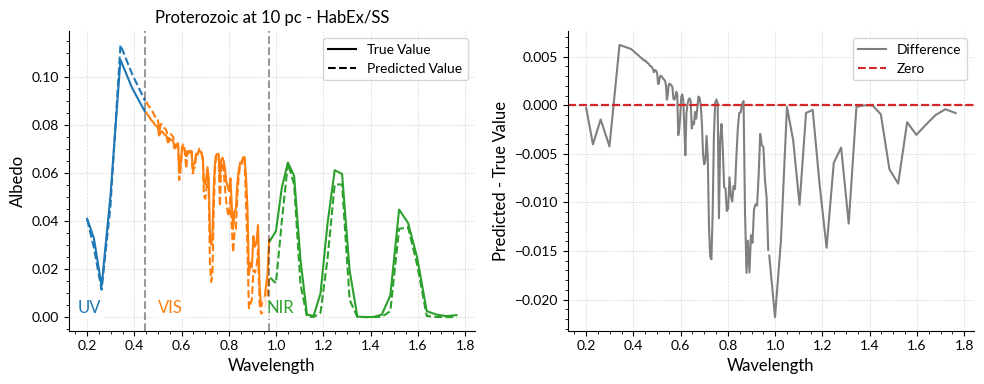

Processing: Archean at 10 pc - HabEx/SS with stage: archean
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


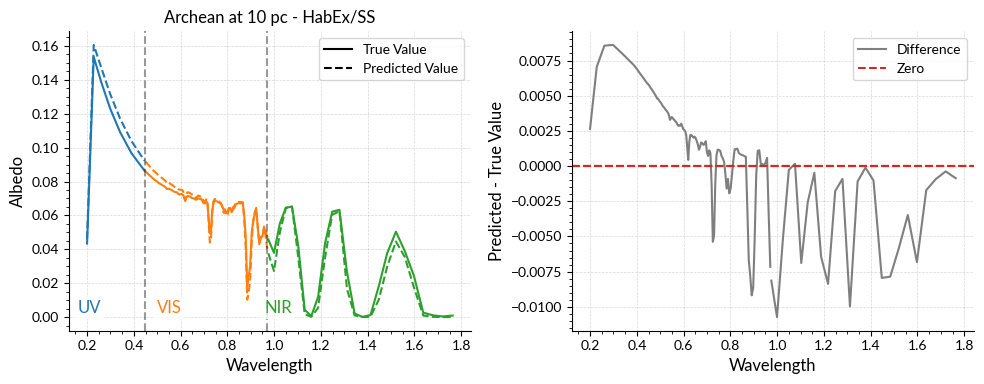

Processing: Modern at 10 pc - HabEx/SS with stage: modern
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


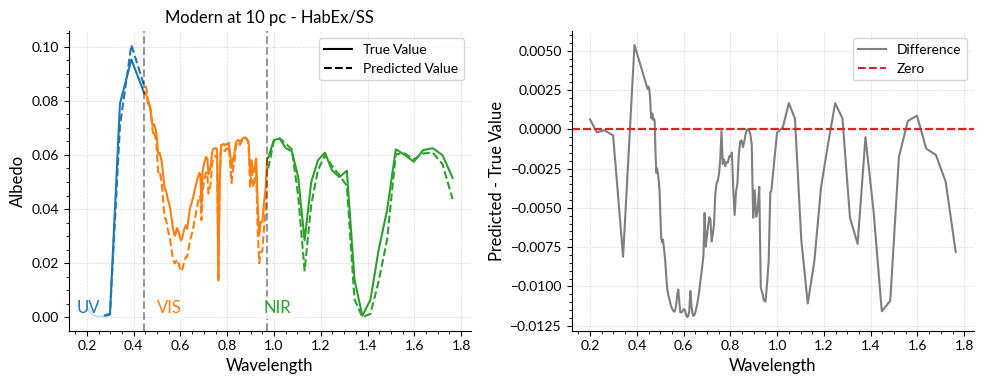

In [22]:
npy_files = glob.glob("../data/tests/*10pc*habex*.npy")
npy_files = [f for f in npy_files if "without" not in os.path.basename(f).lower()]

for file_path in npy_files:
    file_name = os.path.basename(file_path)
    formatted_title = format_title_luvoir(file_name)
    stage = get_stage_from_filename(file_name)
    print("Processing:", formatted_title, "with stage:", stage)
    
    # Load npy file (assumes similar structure as before)
    data = np.load(file_path, allow_pickle=True)
    uv = data[0]["NOISY_ALBEDO"]
    vis = data[1]["NOISY_ALBEDO"]
    nir = data[2]["NOISY_ALBEDO"]
    
    # Normalize each band using loaded stats
    uv_norm = (uv - stats['inputs']['SS-UV']['mean']) / stats['inputs']['SS-UV']['std']
    vis_norm = (vis - stats['inputs']['SS-Vis']['mean']) / stats['inputs']['SS-Vis']['std']
    nir_norm = (nir - stats['inputs']['SS-NIR']['mean']) / stats['inputs']['SS-NIR']['std']
    
    # Reshape to match model input dimensions
    uv_norm = uv_norm.reshape(1, 7, 1)
    vis_norm = vis_norm.reshape(1, 109, 1)
    nir_norm = nir_norm.reshape(1, 25, 1)
    
    # Get predictions from the model using the npy data
    predictions = model_load.predict([uv_norm, vis_norm, nir_norm])
    physical_pred = denormalize_physical(predictions['physical_output'], stats, physical_targets)
    main_chem_pred = denormalize_chemical(predictions['main_chemical_output'], stats, main_chemical_targets)
    other_chem_pred = denormalize_chemical(predictions['other_chemical_output'], stats, other_chemical_targets)
    
    # Extract predicted physical parameters
    predicted_radius      = physical_pred[0, 0] 
    predicted_gravity     = physical_pred[0, 1]
    predicted_temperature = physical_pred[0, 2]
    predicted_pressure    = physical_pred[0, 3]
    
    # Merge chemical predictions into a dictionary.
    predicted_gas_values = {
        "O2": main_chem_pred[0, 0],
        "O3": main_chem_pred[0, 1],
        "CH4": other_chem_pred[0, 0],
        "CO": other_chem_pred[0, 1],
        "CO2": other_chem_pred[0, 2],
        "H2O": other_chem_pred[0, 3],
        "N2": other_chem_pred[0, 4],
        "N2O": other_chem_pred[0, 5]
    }
    
    dg, config = get_config_data(stage)
    uv_real  = generate_original_spectrum(config, "SS-UV", dg)
    vis_real = generate_original_spectrum(config, "SS-Vis", dg)
    nir_real = generate_original_spectrum(config, "SS-NIR", dg)
    
    uv_pred  = generate_modified_spectrum(config, "SS-UV", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    vis_pred = generate_modified_spectrum(config, "SS-Vis", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    nir_pred = generate_modified_spectrum(config, "SS-NIR", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    
    b_uv_end = uv_real["WAVELENGTH"].iloc[-1]
    b_vis_end = vis_real["WAVELENGTH"].iloc[-1]

    _, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Plot all channels on left axis
    axes[0].plot(uv_real["WAVELENGTH"], uv_real["ALBEDO"], color="tab:blue")
    axes[0].plot(uv_pred["WAVELENGTH"], uv_pred["ALBEDO"], linestyle="--", color="tab:blue")

    axes[0].plot(vis_real["WAVELENGTH"], vis_real["ALBEDO"], color="tab:orange")
    axes[0].plot(vis_pred["WAVELENGTH"], vis_pred["ALBEDO"], linestyle="--", color="tab:orange")

    axes[0].plot(nir_real["WAVELENGTH"], nir_real["ALBEDO"], color="tab:green")
    axes[0].plot(nir_pred["WAVELENGTH"], nir_pred["ALBEDO"], linestyle="--", color="tab:green")

    axes[0].axvline(b_uv_end, color='k', linestyle='--', alpha=0.4)
    axes[0].axvline(b_vis_end, color='k', linestyle='--', alpha=0.4)

    axes[0].text(0.05, 0.05, "UV", color='tab:blue', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].text(0.25, 0.05, "VIS", color='tab:orange', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].text(0.52, 0.05, "NIR", color='tab:green', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].set_xlabel("Wavelength")
    axes[0].set_ylabel("Albedo")
    axes[0].set_title(f"{formatted_title}")
    
    # Create custom legend with 2 items: solid for True Value, dashed for Predicted Value.
    true_line = Line2D([], [], color='k', linestyle='-', label='True Value')
    pred_line = Line2D([], [], color='k', linestyle='--', label='Predicted Value')
    axes[0].legend(handles=[true_line, pred_line])

    # Plot difference on right axis for each channel
    channels = [("UV", uv_real, uv_pred),
                ("VIS", vis_real, vis_pred),
                ("NIR", nir_real, nir_pred)]
    for label, df_real, df_pred in channels:
        diff = df_pred["ALBEDO"] - df_real["ALBEDO"]
        axes[1].plot(df_real["WAVELENGTH"], diff, color="tab:gray")
        axes[1].axhline(0, color='tab:red', linestyle='--')
    
    line = Line2D([], [], color='tab:gray', linestyle='-', label='Difference')
    dashed = Line2D([], [], color='tab:red', linestyle='--', label='Zero')

    axes[1].legend(handles=[line, dashed])
    axes[1].set_xlabel("Wavelength")
    axes[1].set_ylabel("Predicted - True Value")
    
    plt.tight_layout()
    plt.show()